In [1]:
# importing libraries
import torch , torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
import time
from collections import OrderedDict
from torchvision import models
import pytz
from datetime import datetime
import os
import matplotlib.pyplot as plt

# importing custom datasets, custom models, util functions
from model import CnnGru, train_arousal, train_valence
from custom_dataset import Train_Dataset, Valid_Dataset, Test_Dataset
from utils import predict_video, plot_curves, save_model, load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
# video paths
video_trim_train= r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\data\video\train_trim'
video_trim_val=r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\data\video\valid_trim'
video_trim_test=r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\data\video\test_trim'

# valence and arousal model weights path
arousal_path = r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\saved_weights\arousal.pth'
valence_path = r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\saved_weights\valence.pth'

### Visualising Data Distribution

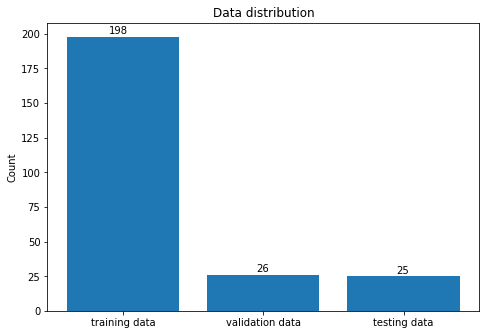

In [3]:
train_data = len(os.listdir(video_trim_train))
valid_data = len(os.listdir(video_trim_val))
test_data = len(os.listdir(video_trim_test))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dataset = ['training data','validation data','testing data']
distribution = [train_data,valid_data,test_data]
plt.text(x=-0.1,y=distribution[0] +2 ,s = distribution[0],size = 10)
plt.text(x=0.95,y=distribution[1] +2,s = distribution[1],size = 10)
plt.text(x=1.95,y=distribution[2] +2,s = distribution[2],size = 10)
ax.bar(dataset,distribution)
ax.set_ylabel('Count')
ax.set_title('Data distribution')
plt.show()

In [4]:
# Hyperparameters
features = 64
num_layers = 10 # the sequence 
hidden_size = 32
batch_size = 8
lr = 0.001
epoch = 5
arousal_name = 'arousal model'
valence_name = 'valence model'
device = 'cuda'
arousal_path = r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\saved_weights\arousal.pth'
valence_path = r'C:\Users\jeroe\Documents\DeepLearning\Big_Project\saved_weights\valence.pth'

### Initialising custom dataset and dataloader for train, valid, test

In [5]:
batch_size = 8

train_dataset = Train_Dataset()
valid_dataset = Valid_Dataset()
test_dataset = Test_Dataset()

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = True)
print_every = len(train_loader)

In [6]:
model_arousal = CnnGru(features,num_layers,hidden_size,batch_size)
model_valence = CnnGru(features,num_layers,hidden_size,batch_size)

In [7]:
arousal_model, train_loss_arousal, val_loss_arousal = train_arousal(model=model_arousal,train_loader=train_loader,val_loader=val_loader, n_epochs=epoch,lr=lr, save_path=arousal_path)

start training arousal model.....
total epochs: 5
epoch:1 batch:1
epoch:1 batch:2
epoch:1 batch:3
epoch:1 batch:4
epoch:1 batch:5
epoch:1 batch:6
epoch:1 batch:7
epoch:1 batch:8
epoch:1 batch:9
epoch:1 batch:10
epoch:1 batch:11
epoch:1 batch:12
epoch:1 batch:13
epoch:1 batch:14
epoch:1 batch:15
epoch:1 batch:16
epoch:1 batch:17
epoch:1 batch:18
epoch:1 batch:19
epoch:1 batch:20
epoch:1 batch:21
epoch:1 batch:22
epoch:1 batch:23
epoch:1 batch:24
epoch:1 batch:25
Epoch: 1/5 -  Time: 2021-05-03 22:33:01.754413+08:00  Training Loss: 0.116 -  Validation Loss: 0.050 - 
epoch:2 batch:1
epoch:2 batch:2
epoch:2 batch:3
epoch:2 batch:4
epoch:2 batch:5
epoch:2 batch:6
epoch:2 batch:7
epoch:2 batch:8
epoch:2 batch:9
epoch:2 batch:10
epoch:2 batch:11
epoch:2 batch:12
epoch:2 batch:13
epoch:2 batch:14
epoch:2 batch:15
epoch:2 batch:16
epoch:2 batch:17
epoch:2 batch:18
epoch:2 batch:19
epoch:2 batch:20
epoch:2 batch:21
epoch:2 batch:22
epoch:2 batch:23
epoch:2 batch:24
epoch:2 batch:25
Epoch: 2/5 -  

In [10]:
valence_model, train_loss_valence, val_loss_valence = train_valence(model=model_valence,train_loader=train_loader,val_loader=val_loader, n_epochs=epoch,lr=lr, save_path=valence_path)

start training valence model.....
total epochs: 5
epoch:1 batch:1
epoch:1 batch:2
epoch:1 batch:3
epoch:1 batch:4
epoch:1 batch:5
epoch:1 batch:6
epoch:1 batch:7
epoch:1 batch:8
epoch:1 batch:9
epoch:1 batch:10
epoch:1 batch:11
epoch:1 batch:12
epoch:1 batch:13
epoch:1 batch:14
epoch:1 batch:15
epoch:1 batch:16
epoch:1 batch:17
epoch:1 batch:18
epoch:1 batch:19
epoch:1 batch:20
epoch:1 batch:21
epoch:1 batch:22
epoch:1 batch:23
epoch:1 batch:24
epoch:1 batch:25
Epoch: 1/5 -  Time: 2021-05-03 23:06:38.746980+08:00  Training Loss: 0.061 -  Validation Loss: 0.029 - 
epoch:2 batch:1
epoch:2 batch:2
epoch:2 batch:3
epoch:2 batch:4
epoch:2 batch:5
epoch:2 batch:6
epoch:2 batch:7
epoch:2 batch:8
epoch:2 batch:9
epoch:2 batch:10
epoch:2 batch:11
epoch:2 batch:12
epoch:2 batch:13
epoch:2 batch:14
epoch:2 batch:15
epoch:2 batch:16
epoch:2 batch:17
epoch:2 batch:18
epoch:2 batch:19
epoch:2 batch:20
epoch:2 batch:21
epoch:2 batch:22
epoch:2 batch:23
epoch:2 batch:24
epoch:2 batch:25
Epoch: 2/5 -  

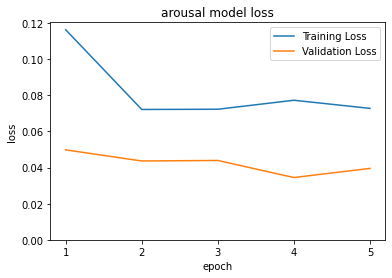

In [9]:
plot_curves(arousal_name,epoch,train_loss_arousal,val_loss_arousal)

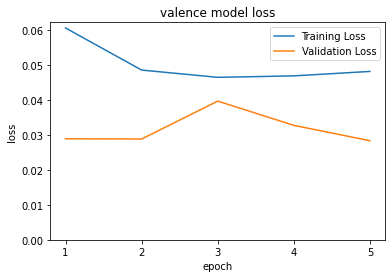

In [11]:
plot_curves(valence_name,epoch,train_loss_valence,val_loss_valence)

In [ ]:
# reloading model from local path 
return_model_arousal = load_model(CnnGru(features,num_layers,hidden_size,batch_size),path=arousal_path).to(device)
return_model_valence = load_model(CnnGru(features,num_layers,hidden_size,batch_size),path=valence_path).to(device)